Importación de todas las librerías que van a ser necesarias a la hora del desarrollo del EDA.

In [35]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


In [48]:
df = pd.read_parquet('E:\\Proyecto Final Soy Henry\\\EDA\\Datasets a pasar\\business-metadatos-inner.parquet')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126383 entries, 0 to 126382
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   business_id     80879 non-null   object 
 1   name            126383 non-null  object 
 2   state           126383 non-null  object 
 3   latitude        80879 non-null   float64
 4   longitude       80879 non-null   float64
 5   stars           80879 non-null   float64
 6   review_count    80879 non-null   float64
 7   categories      80879 non-null   object 
 8   description     91478 non-null   object 
 9   category        126383 non-null  object 
 10  avg_rating      126383 non-null  float64
 11  num_of_reviews  126383 non-null  int64  
dtypes: float64(5), int64(1), object(6)
memory usage: 11.6+ MB


<>:1: SyntaxWarning: invalid escape sequence '\E'
<>:1: SyntaxWarning: invalid escape sequence '\E'
C:\Users\User\AppData\Local\Temp\ipykernel_16472\1710864057.py:1: SyntaxWarning: invalid escape sequence '\E'
  df = pd.read_parquet('E:\\Proyecto Final Soy Henry\\\EDA\\Datasets a pasar\\business-metadatos-inner.parquet')


In [37]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


<Axes: >

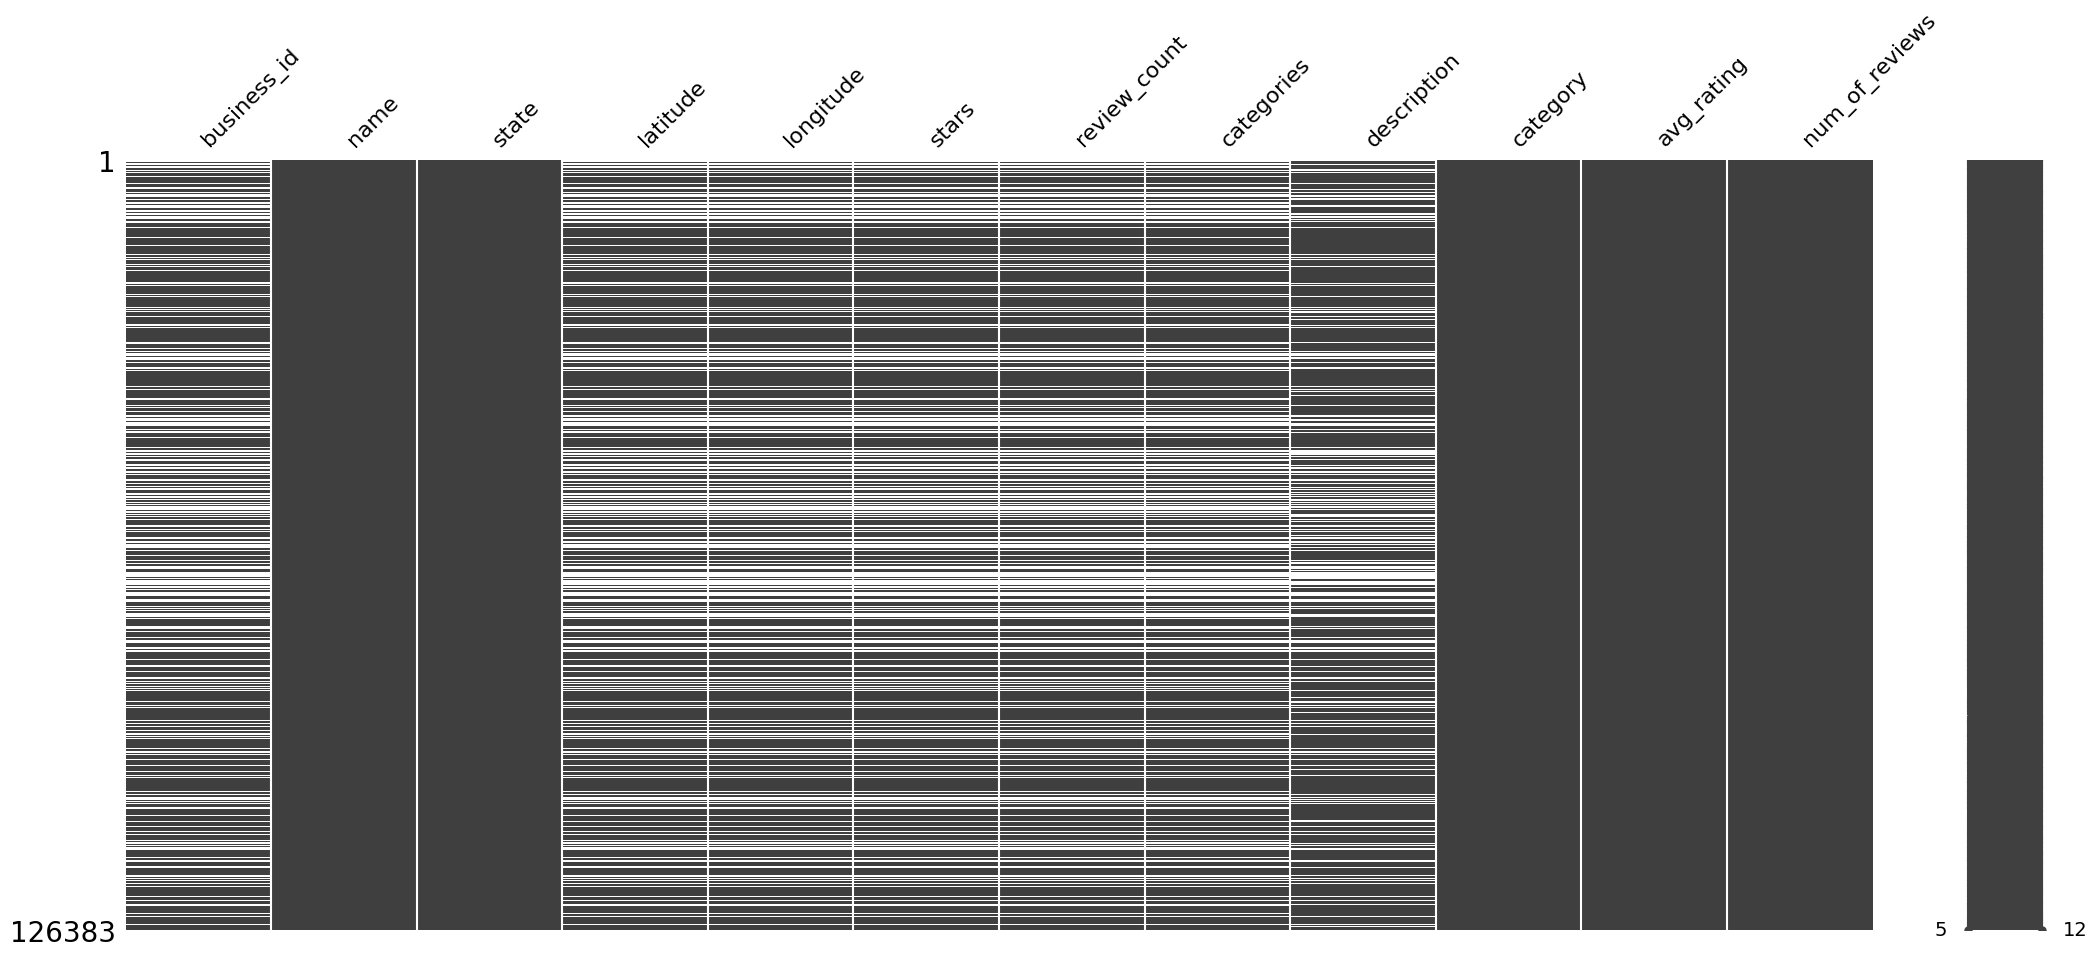

In [4]:
import missingno as msno

%matplotlib inline
msno.matrix(df)

In [49]:
df.drop(columns=['categories'],inplace=True)

In [50]:
# Desanidar la columna 'category'
df = df.explode('category')

# Mostrar los primeros resultados
df.head()


,business_id,name,state,latitude,longitude,stars,review_count,description,category,avg_rating,num_of_reviews
0,X6_5_b4gVKo83VPn0FyONw,Vivi Bubble Tea,PA,39.954832,-75.155838,4.0,259.0,"Bubble tea shop offering hot & cold versions, ...",Restaurant,4.0,8
1,None,Benny's Famous Fried Clams,ME,NaN,NaN,NaN,NaN,None,Restaurant,2.8,17
2,None,Dunkin',NY,NaN,NaN,NaN,NaN,Long-running chain serving signature breakfast...,Coffee shop,3.5,8
2,None,Dunkin',NY,NaN,NaN,NaN,NaN,Long-running chain serving signature breakfast...,Bagel shop,3.5,8
2,None,Dunkin',NY,NaN,NaN,NaN,NaN,Long-running chain serving signature breakfast...,Bakery,3.5,8


In [51]:

# Crear el imputador con la estrategia de imputación por media
imputador = SimpleImputer(strategy='mean')

# Aplicar la imputación a las columnas numéricas
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
df[columnas_numericas] = imputador.fit_transform(df[columnas_numericas])

Realicé esta acción porque a la hora de imputar los datos mediante la media se me creaba un valor de 2.537869. Yo lo redondée a 2.5 por que es el valor más cercano y real.

In [56]:
# Definir un margen de error para la comparación (por ejemplo, 1e-6)
tolerancia = 1e-6

# Reemplazar cualquier valor que esté dentro del margen de error cercano a 2.537869
#y utilizo el abs para cuantificar la dispersión en un conjunto de datos.
df['stars'] = df['stars'].apply(lambda x: 2.5 if abs(x - 2.537869) < tolerancia else x)

# Verificar los cambios
print(df['stars'].value_counts())


stars
2.5    205747
2.0    124162
3.0     80975
1.5     63006
3.5     59075
4.0     28068
1.0      5595
4.5      3812
5.0       558
Name: count, dtype: int64


<Axes: >

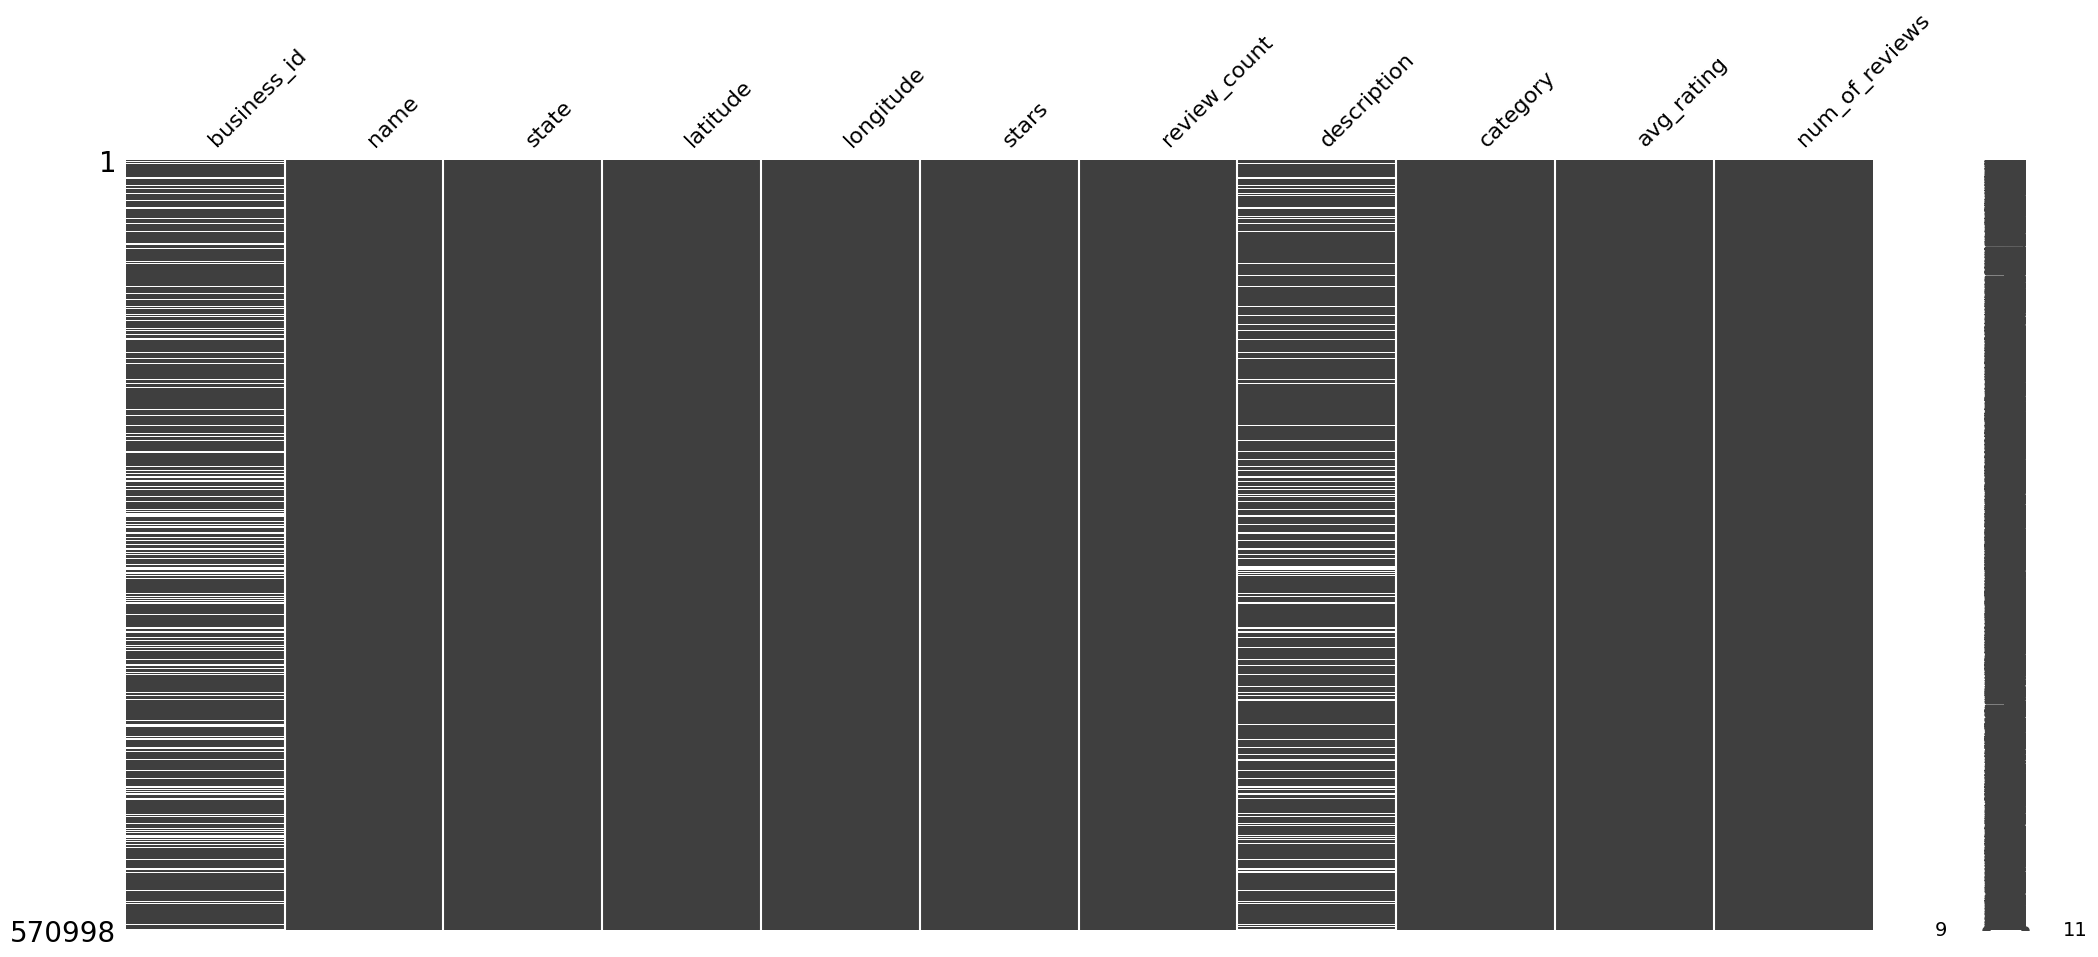

In [42]:
%matplotlib inline
msno.matrix(df)

# *Estados con más sitios de comidas.*

En este gráfico solamente vamos a contemplar la cantidad de restaurantes que poseen cada Estado del país norteamericano. Es para observar con atención la demanda de este rubro en el costado Atlántico del país.

Listados de acrónimos para la costa este

- PA Pensilvania
- NJ Nueva Jersey
- NY Nueva York
- VA Virginia
- MA Massachussetts
- MD Maryland
- DE Delaware
- ME Maine



C:\Users\User\AppData\Local\Temp\ipykernel_16472\2524759342.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values,y=top.index,palette='viridis')


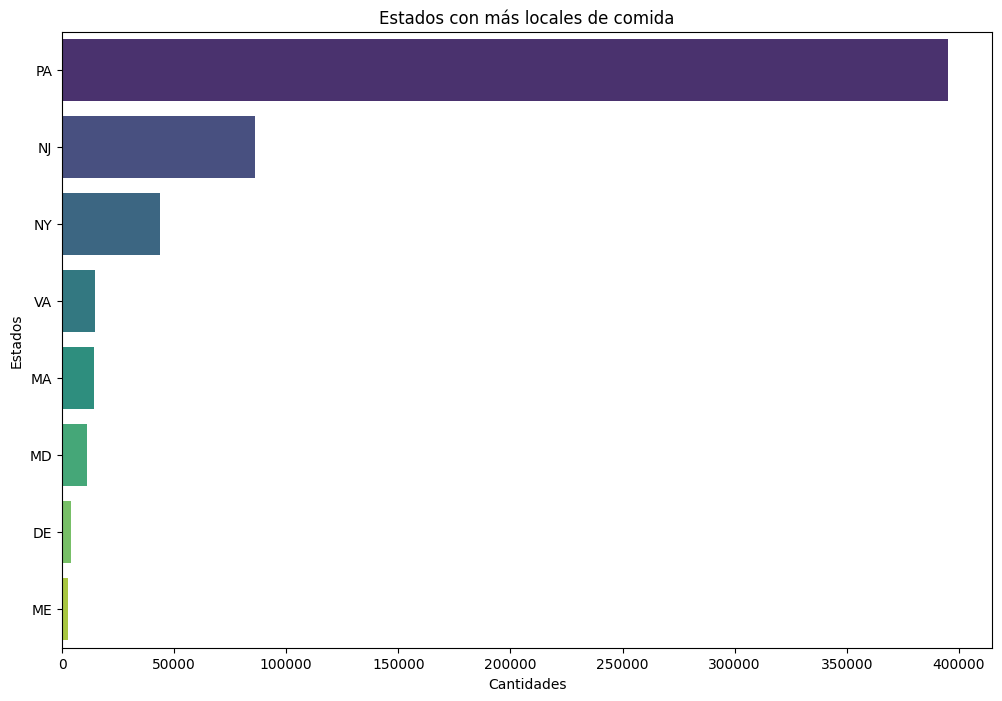

In [43]:
estados_frecuentes = df['state'].value_counts()
top=estados_frecuentes.head(8)
plt.figure(figsize=(12,8))
sns.barplot(x=top.values,y=top.index,palette='viridis')
plt.title('Estados con más locales de comida')
plt.xlabel('Cantidades')
plt.ylabel('Estados')
plt.show()

La cantidad de restaurantes es proporcinal a la cantidad de habitantes que hay en cada estado. Por una cuestión de lógica, a mayor cantidad de habitantes que posee un Estado, mayor va a ser la oferta de comida.

# *Categorías más comunes.*

C:\Users\User\AppData\Local\Temp\ipykernel_16472\2966876397.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values,y=top.index,palette='viridis')


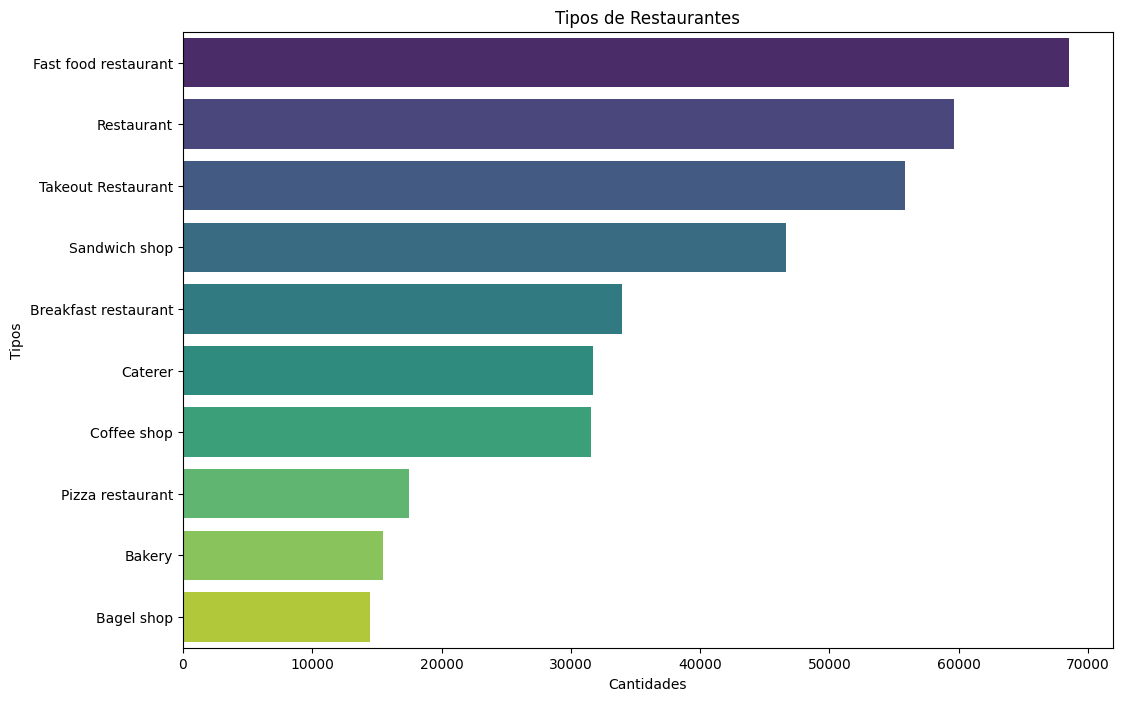

In [44]:
categorias_frecuentes = df['category'].value_counts()
top=categorias_frecuentes.head(10)
plt.figure(figsize=(12,8))
sns.barplot(x=top.values,y=top.index,palette='viridis')
plt.title('Tipos de Restaurantes')
plt.xlabel('Cantidades')
plt.ylabel('Tipos')
plt.show()

Como se puede notar a simple vista, la comida rápida (Fast Food) es la categoría que más se repite. Esto se debe a la facilidad a la hora de realizar los platos (hamburguesas,hot dogs,papas fritas) sumado al hecho de que la gente no suele estar mucho tiempo en los establecimientos de este tipo. A su vez de la gran ganancia que debe generar este tipo de categoría por la rotación permanente de clientes en el establecimiento.


C:\Users\User\AppData\Local\Temp\ipykernel_16472\3546954243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['stars'].values,y=df['stars'].index,palette='viridis')


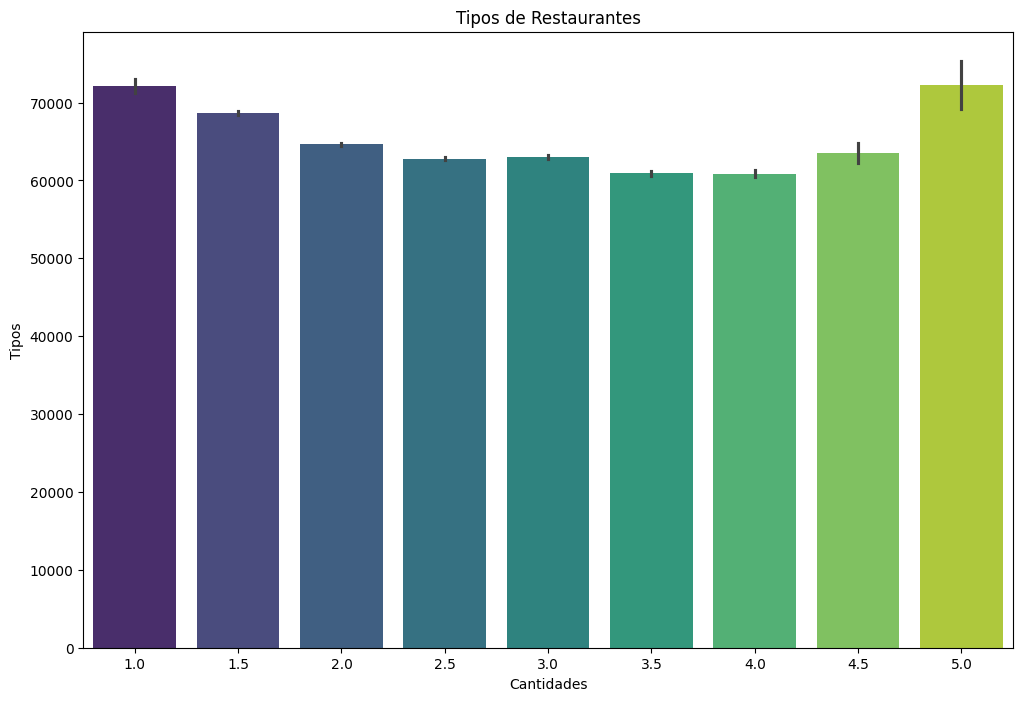

In [58]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['stars'].values,y=df['stars'].index,palette='viridis')
plt.title('Tipos de Restaurantes')
plt.xlabel('Cantidades')
plt.ylabel('Tipos')
plt.show()

La verdad que hay una generalidad a la hora de los puntajes en cada estado. No hay un estado que se destaque mejor que otro por la calidad de comida al parecer.

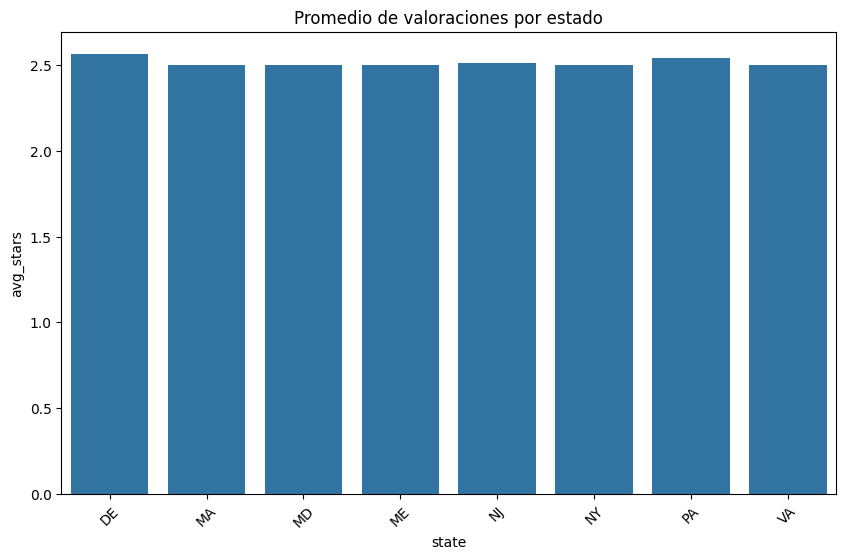

In [61]:
# Calcular el promedio de las estrellas por estado
promedio = df.groupby('state')['stars'].mean().reset_index()

# Renombrar las columnas para mayor claridad
promedio.columns = ['state', 'avg_stars']

# Gráfico de barras del promedio de estrellas por estado
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='avg_stars', data=promedio)
plt.title('Promedio de valoraciones por estado')
plt.xticks(rotation=45)
plt.show()
